Logistic regression is a linear classifier, so you’ll use a linear function 𝑓(𝐱) = 𝑏₀ + 𝑏₁𝑥₁ + ⋯ + 𝑏ᵣ𝑥ᵣ, also called the logit. The variables 𝑏₀, 𝑏₁, …, 𝑏ᵣ are the estimators of the regression coefficients, which are also called the predicted weights or just coefficients.

The logistic regression function 𝑝(𝐱) is the sigmoid function of 𝑓(𝐱): 𝑝(𝐱) = 1 / (1 + exp(−𝑓(𝐱)). As such, it’s often close to either 0 or 1. The function 𝑝(𝐱) is often interpreted as the predicted probability that the output for a given 𝐱 is equal to 1. Therefore, 1 − 𝑝(𝑥) is the probability that the output is 0.

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

The input and output should be NumPy arrays (instances of the class numpy.ndarray) or similar objects. numpy.arange() creates an array of consecutive, equally-spaced values within a given range. For more information on this function, check the official documentation or NumPy arange(): How to Use np.arange().

The array x is required to be two-dimensional. It should have one column for each input, and the number of rows should be equal to the number of observations. To make x two-dimensional, you apply .reshape() with the arguments -1 to get as many rows as needed and 1 to get one column. For more information on .reshape(), you can check out the official documentation. Here’s how x and y look now:

In [75]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [76]:
model = LogisticRegression(solver='liblinear', random_state=0, tol=0.1)

The above statement creates an instance of LogisticRegression and binds its references to the variable model. LogisticRegression has several optional parameters that define the behavior of the model and approach:

- penalty is a string ('l2' by default) that decides whether there is regularization and which approach to use. Other options are 'l1', 'elasticnet', and 'none'.

- dual is a Boolean (False by default) that decides whether to use primal (when False) or dual formulation (when True).


- tol is a floating-point number (0.0001 by default) that defines the tolerance for stopping the procedure.


- C is a positive floating-point number (1.0 by default) that defines the relative strength of regularization. Smaller values indicate stronger regularization.


- fit_intercept is a Boolean (True by default) that decides whether to calculate the intercept 𝑏₀ (when True) or consider it equal to zero (when False).


- intercept_scaling is a floating-point number (1.0 by default) that defines the scaling of the intercept 𝑏₀.


- class_weight is a dictionary, 'balanced', or None (default) that defines the weights related to each class. When None, all classes have the weight one.


- random_state is an integer, an instance of numpy.RandomState, or None (default) that defines what pseudo-random number generator to use.


- solver is a string ('liblinear' by default) that decides what solver to use for fitting the model. Other options are 'newton-cg', 'lbfgs', 'sag', and 'saga'.


- max_iter is an integer (100 by default) that defines the maximum number of iterations by the solver during model fitting.


- multi_class is a string ('ovr' by default) that decides the approach to use for handling multiple classes. Other options are 'multinomial' and 'auto'.


- verbose is a non-negative integer (0 by default) that defines the verbosity for the 'liblinear' and 'lbfgs' solvers.


- warm_start is a Boolean (False by default) that decides whether to reuse the previously obtained solution.


- n_jobs is an integer or None (default) that defines the number of parallel processes to use. None usually means to use one core, while -1 means to use all available cores.


- l1_ratio is either a floating-point number between zero and one or None (default). It defines the relative importance of the L1 part in the elastic-net regularization.

You should carefully match the solver and regularization method for several reasons:


- 'liblinear' solver doesn’t work without regularization.

- 'newton-cg', 'sag', 'saga', and 'lbfgs' don’t support L1 regularization.

- 'saga' is the only solver that supports elastic-net regularization.

In [77]:
model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

You can quickly get the attributes of your model. For example, the attribute .classes_ represents the array of distinct values that y takes:

In [78]:
model.classes_

array([0, 1])

This is the example of binary classification, and y can be 0 or 1, as indicated above.

You can also get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 like so:

In [79]:
model.intercept_

array([-1.04608067])

In [80]:
model.coef_

array([[0.51491375]])

As you can see, 𝑏₀ is given inside a one-dimensional array, while 𝑏₁ is inside a two-dimensional array. You use the attributes .intercept_ and .coef_ to get these results.

In [81]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In the matrix above, each row corresponds to a single observation. The first column is the probability of the predicted output being zero, that is 1 - 𝑝(𝑥). The second column is the probability that the output is one, or 𝑝(𝑥).

You can get the actual predictions, based on the probability matrix and the values of 𝑝(𝑥), with .predict():

In [82]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [83]:
![dataset](data/05/LinearRegression.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")


In [84]:
model.score(x, y)

0.9

In [85]:
confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]])

The obtained matrix shows the following:

- Three true negative predictions: The first three observations are zeros predicted correctly.
- No false negative predictions: These are the ones wrongly predicted as zeros.
- One false positive prediction: The fourth observation is a zero that was wrongly predicted as one.
- Six true positive predictions: The last six observations are ones predicted correctly.

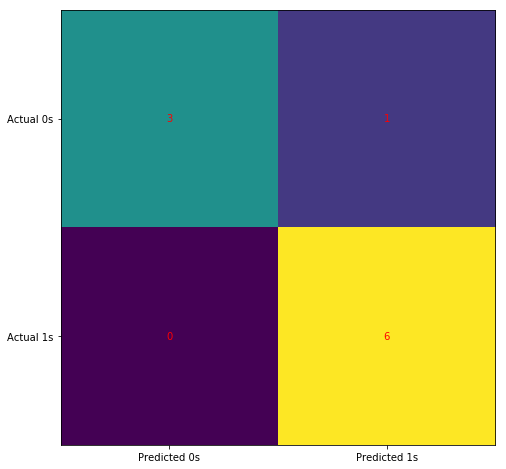

In [86]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [87]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [88]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x, y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [89]:
model.intercept_

array([-3.51335372])

In [58]:
model.coef_

array([[1.12066084]])

In [59]:
model.predict_proba(x)

array([[0.97106534, 0.02893466],
       [0.9162684 , 0.0837316 ],
       [0.7810904 , 0.2189096 ],
       [0.53777071, 0.46222929],
       [0.27502212, 0.72497788],
       [0.11007743, 0.88992257],
       [0.03876835, 0.96123165],
       [0.01298011, 0.98701989],
       [0.0042697 , 0.9957303 ],
       [0.00139621, 0.99860379]])

In [60]:
model.predict(x)

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [61]:
model.score(x, y)

1.0

In [62]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]])

In [63]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

